# 1. 들어가며

이번 목표는 **"머신러닝의 본질을 관통하는 철학과, 그 과정"을 깊게 파고들어 이해해보는 것"**이다.



In [6]:
a = {0,102}
a

{0, 102}

In [82]:
# 실습에 필요한 모듈
from IPython.display import display, Image

## step1. "사용한 연수"만 가지고 맥북의 중고가 맞춰보기

### (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기

데이터셋을 가져와서 두 변수 간의 상관관계 이해하기
- 사용 연수와 중고가격에는 어떤 상관관계가 있을까?

#### 1) 데이터 준비
라이브러리 import

In [83]:
import pandas as pd

In [84]:
macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


데이터를 불러오면서 표의 크기(shape)와 표의 가장 윗부분을 간단히 확인했다.


#### 2) 데이터 시각화
matplotlib 라이브러리를 사용해서 데이터를 더 직관적으로 보자.


In [85]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

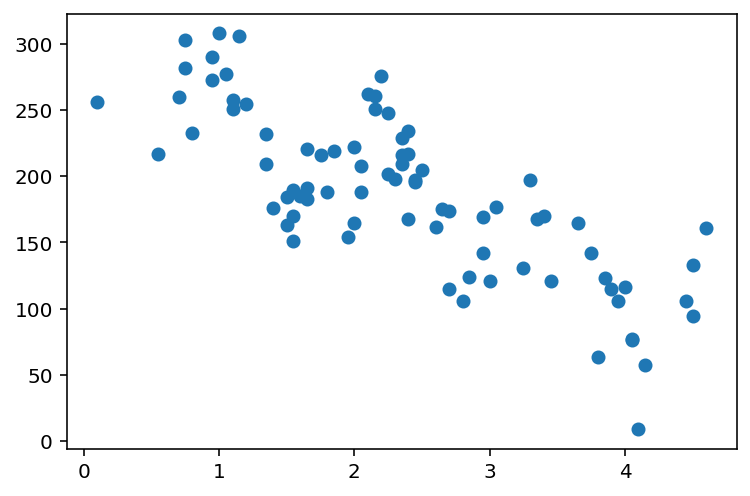

In [86]:
plt.scatter(macbook['used_years'], macbook['price'])
#x축에는 사용 연수, y축에는 중고가 입력
plt.show()

#### 3) 상관관계
상관 관계의 정도는 '(Pearson) 상관 계수'로 표현할 수 있다.

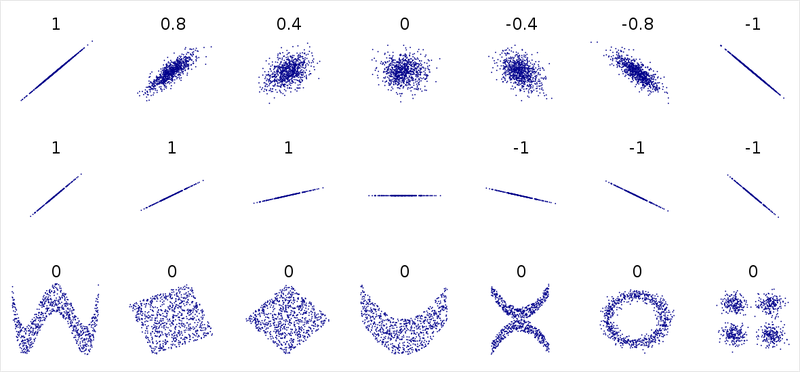

출처: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

위 이미지는 두 변수에 대해 데이터가 어떻게 분포하는지를 나타냈다.

상관관계가 강하다면 상관계수의 절대값이 커진다.

여기서 주의할 점은 이미지의 두 번째 줄이다. 이들의 데이터 분포는 직선이지만 기울기가 다르다. 그럼에도 불구하고 이들은 **모두 상관관계가 -1 또는 1**이다.

`상관계수`는 기울기를 이야기하는 것이 아니라, 두 변수간에 한 변수가 변함에 따라 다른 변수가 어떻게 변하는지에 대한 `상호적인 관계의 정도`를 나타내는 것이기 때문이다!

이미지의 마지막 줄에는 데이터 분포가 분명히 어떤 '패턴'을 가지지만, 어떤 상관관계를 가지는 것은 아니므로 상관계수는 0이다.

#### 4) 상관계수 구해보기
통계학, 데이터사이언스에서 가장 많이 쓰이는 라이브러리인 numpy에서는 상관계수를 보여주는 `corrcoef()`라는 함수를 제공한다.
상관관계를 확인하고 싶은 두 변수가 있다면 `np.corrcoef(x,y)`형태로 넣어주면 된다.



In [87]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

변수가 2개이기 때문에 2x2 행렬로 나타난다.
-0.78로 강한 음의 상관관계를 확인할 수 있다!

## (2) "모델"을 만든다는 것, 그 의미 이해하기
**회귀 분석의 시작, 일차함수 모델을 그려보고 그 의미 알아보기**

### 1) 모델이란?
- 모델: 특정 정보를 입력받아 그 정보에 따라 원하는 값을 `예측`하여 값을 출력하는 함수
- 목적을 다시 정리해보자.
   - 사용 연수를 입력받아서
   - 중고가를 예측한다.
  
- 따라서 입력은 사용연수, 예측값은 중고가이다. 코드로 작성하자.


In [88]:
x = macbook["used_years"].values
y = macbook["price"].values
print("실행 완료")

실행 완료


### 2) 일차함수 모델


In [89]:
def model(x, w, b):
    y = w * x + b
    return y

### 3) 모델 학습이란?
이제 모델을 training해보자. 모델을 training 시킨다는 것은 모델이 입력을 받을 때, 정답에 가까운 출력을 낼 수 있는 최적의 "매개변수", 혹은 "파라미터"를 찾는다는 뜻과 같다.



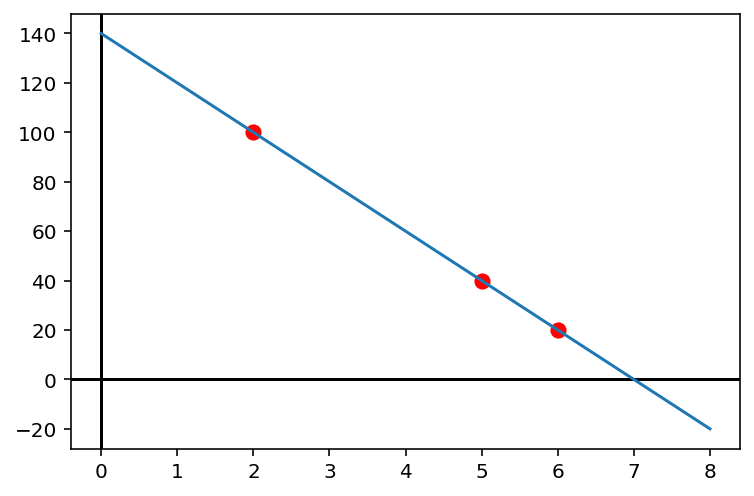

In [90]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

#### 4) 오차를 최소화하는 모델
위와 같이 우리는 현실에서 저렇게 문제를 풀 수 없다.
왜냐하면, 데이터가 일직선 위에 정렬되어 있지 않기 때문이다.

그렇다면 우리는 위 데이터만을 가지고 최적의 파라미터들을 어떻게 찾을까?

## (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

### 1) "최적의" 함수는 어떻게 찾을 수 있을까?

가장 간단한 방법, "일차함수"를 찾는 방법을 먼저 배워볼 것이다.
`손실함수`: 불완전한ㄴ 현재 모델이 출력하는 값과 실제 정답 간의 차이

### 2) 예시를 통해 이해하기

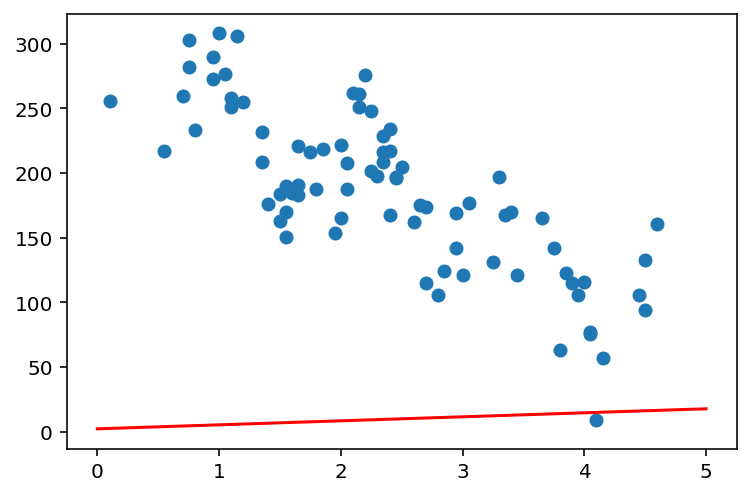

In [91]:
w = 3.1
b = 2.3

x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

모델이 얼마나 정확히 예측한지 확인해보자.

In [92]:
x = macbook["used_years"].values
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
macbook['prediction'] = prediction

macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


아직은 loss값이 많이 큰 것을 알 수 있다.

### 3) 정답과 예측값 간의 차이

In [93]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


**Regression Model Accuracy Check**

- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

이 중 많이 사용되는 것은 **RMSE**이다.

In [94]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

그렇다면 RMSE를 이용해 loss값을 구해보자.

In [95]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)

rmse = RMSE(predictions, y)
rmse

188.81322969819274

### 4) 손실함수(비용함수)
loss function(cost function): function that computes the distance between the current output of the algorithm and the expected output.

loss function을 RMSE를 활용해 다음과 같이 정의하자.=

In [96]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

## (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지
### 1) gradient descent

In [97]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

## (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

**정의된 손실함수와 기울기 함수로 모델을 학습시켜 최적화하기**

### 1) 하이퍼 파라미터
하이퍼파라미터: 사람이 직접 사전에 정하고 시작해야 하는 파라미터

learning rate부터 정의하자.

In [98]:
LEARNING_RATE = 1

### 2) model 최적화

In [99]:
#데이터 준비
x = macbook["used_years"].values
y = macbook["price"].values

#가중치 랜덤
w = 3.1
b = 2.3

#loss list
losses = []

#learning
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print(f'Iteration {i} : Loss {L:0.4f}')

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


Iteration이 진행될 때마다 loss값이 떨어지고 있는 것이 보인다.

그래프로도 확인해보자.

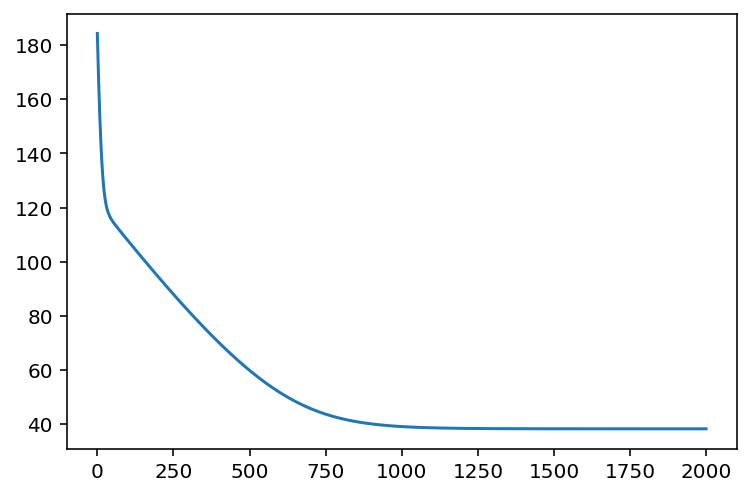

In [100]:
plt.plot(losses)
plt.show()

이제 원래 데이터와 학습이 완료된 모델, 일차함수를 함께 그려보자.

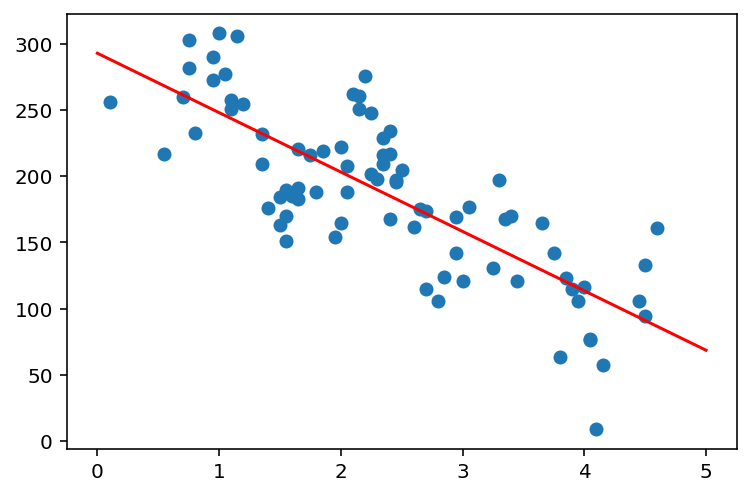

In [101]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

이제 macbook_test 데이터를 보자.

In [102]:
test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [103]:
test_x = test['used_years'].values
test_y = test['price'].values

prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


이전에 비해 그나마 비슷한 예측을 한다.
error를 직접 계산해서 새 열에서 살펴보자.

In [104]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


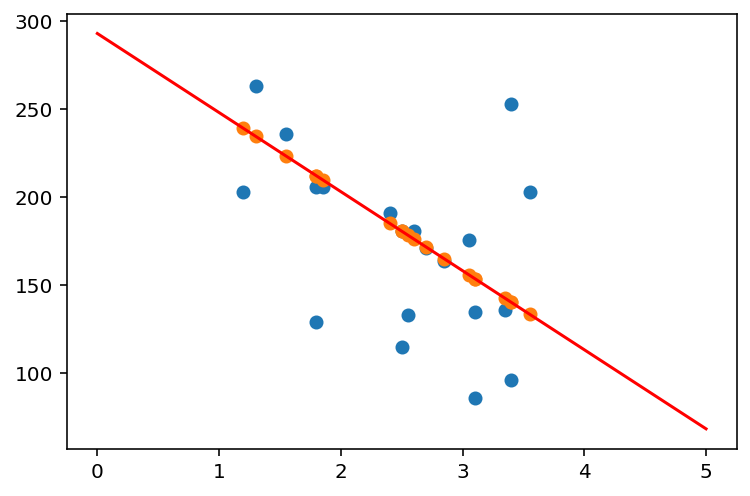

In [105]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

_______

# 다양한 정보로 원하는 값을 예측해 보기 

##  (1) 손님의 성별, 수, 총 결제 금액 등으로 내가 받을 팁을 예측할 수 있을까?

**다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기**



In [106]:
import seaborn as sns
#- ! bs4 모듈이 설치되어 있어야 합니다. -#

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

이 중 tips data를 사용하자

In [107]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


여기서 문제는 문자열 형태의 데이터가 몇몇 있다는 것이다. 모델에 넣을 땐 모든 데이터의 값이 실수여야 한다. 

따라서, `get_dummies()`함수를 사용해 문자열 데이터를 0, 1로 변환시켜주자.
수식을 구할 때 범주형 데이터가 있다면 더미 변수(dummy variable)를 활용해 식에 포함시킨다.


In [108]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


위와 같은 데이터 변환 방식을 **원-핫 인코딩**이라고 한다.

또, 우리는 모든 데이터를 가지고 tip값을 예측하는 것이 목적이기 때문에, tip column을 제일 우측에 두자

In [109]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


### 1) 선형 회귀
다변수 일차방정식 = 선형 방정식
**선형 회귀**: 선형방정식을 활용해 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법

### 2) 표기법
매개변수는 w, 상수는 b 혹은 w0로 표기한다.

## (2) 다시 한 번 직접 설계해 보는 손실함수

**다변수 데이터에 대해 선형회귀를 하기 위한 손실함수를 정의하기**

데이터를 준비하자.
다만, 앞으로 `X`는 12개 값을 가지는 벡터이므로, 대문자로 표기하자

In [110]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

`sklearn`라이브러리에 있는 `train_test_split`을 활용해 데이터를 분리하자.

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


길이가 12인 W와 1개의 상수인 b를 준비

In [112]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

이전과 동일하게 `for`문을 활용해 x*w를 수행하고 마지막에 b를 더하자

In [113]:
W

array([0.72150845, 0.52742826, 0.22880197, 0.05281511, 0.04757561,
       0.010072  , 0.99508336, 0.86618587, 0.95042345, 0.03652134,
       0.18427133, 0.22306126])

In [114]:
b

0.5267009429902229

In [115]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [116]:
def MSE(a,b):
    mse= ((a-b)**2).mean()
    return mse

In [117]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

**MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기**
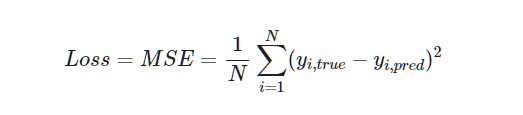

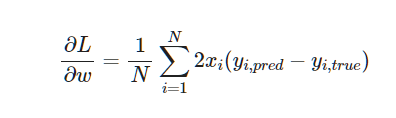

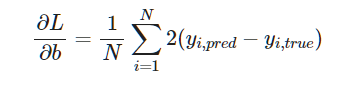

이를 구현하면 다음과 같다.

In [118]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [119]:
# 예시
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [13526.05256716  1625.76606505   389.24577102   189.55023131
   231.72378491   347.07221741   135.83014333    39.70184422
   217.26385347   186.00016131   144.89727941   433.89872292]
db: 28.46537716361815


## (4) 모두 준비 되었다면, 모델 학습은 간단하다구!

**직접 구현한 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습하기**
이제 가중치를 업데이터하며 학습을 진행해 보자.

In [120]:
LEARNING_RATE = 0.0001

In [121]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print(f'Iteration {i} : Loss {L:0.4f}')

Iteration 10 : Loss 1.5925
Iteration 20 : Loss 1.5663
Iteration 30 : Loss 1.5511
Iteration 40 : Loss 1.5365
Iteration 50 : Loss 1.5226
Iteration 60 : Loss 1.5093
Iteration 70 : Loss 1.4965
Iteration 80 : Loss 1.4843
Iteration 90 : Loss 1.4726
Iteration 100 : Loss 1.4613
Iteration 110 : Loss 1.4505
Iteration 120 : Loss 1.4402
Iteration 130 : Loss 1.4302
Iteration 140 : Loss 1.4207
Iteration 150 : Loss 1.4115
Iteration 160 : Loss 1.4026
Iteration 170 : Loss 1.3941
Iteration 180 : Loss 1.3860
Iteration 190 : Loss 1.3781
Iteration 200 : Loss 1.3705
Iteration 210 : Loss 1.3632
Iteration 220 : Loss 1.3561
Iteration 230 : Loss 1.3493
Iteration 240 : Loss 1.3427
Iteration 250 : Loss 1.3364
Iteration 260 : Loss 1.3302
Iteration 270 : Loss 1.3243
Iteration 280 : Loss 1.3186
Iteration 290 : Loss 1.3130
Iteration 300 : Loss 1.3077
Iteration 310 : Loss 1.3025
Iteration 320 : Loss 1.2975
Iteration 330 : Loss 1.2926
Iteration 340 : Loss 1.2879
Iteration 350 : Loss 1.2834
Iteration 360 : Loss 1.2790
I

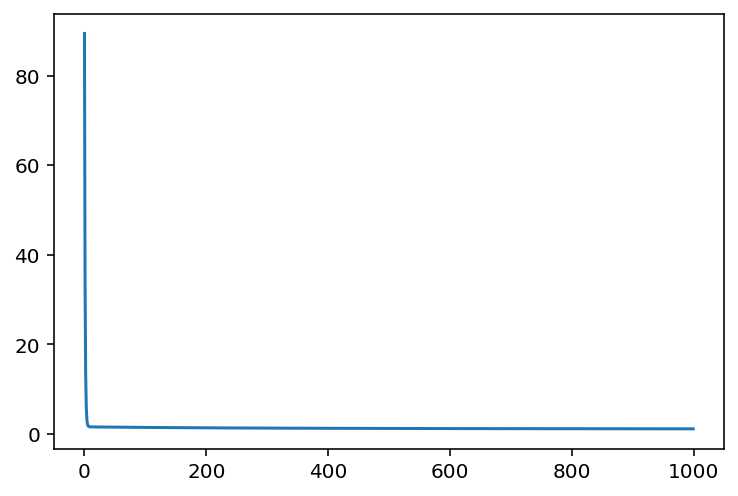

In [122]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

잘 학습이 되고 있음을 알 수 있다.
데이터에 대한 예측을 해보자.

In [123]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.669167983504703

마지막으로 모델이 예측한 prediction과 y_test를 비교해서 확인해보자.

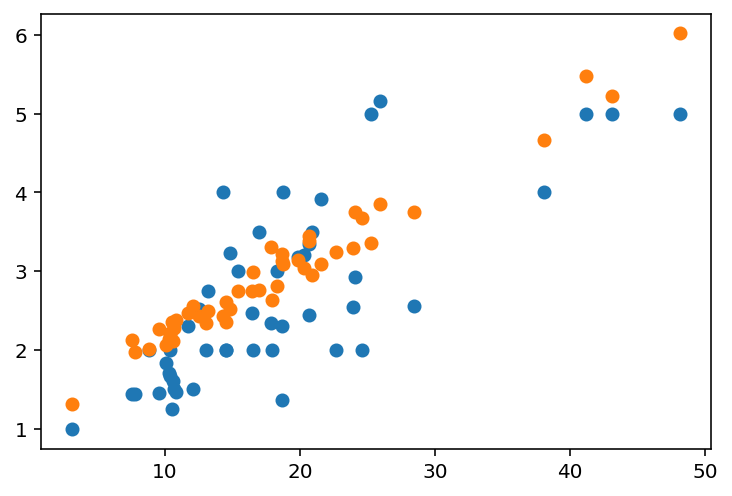

In [124]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

x축에는 total_bill, y축에는 각각 real tip과 prediction tip을 표시했다.
________

## (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게
**모델 설계, 손실함수 정의, 기울기 계산 및 최적화 과정을 sklearn으로 진행하기**

사이킷런을 이용하면 더욱 간단한 학습이 가능하다.

In [125]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [127]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [129]:
model.fit(X_train, y_train) #학습

LinearRegression()

In [132]:
predictions = model.predict(X_test) #예측

In [134]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) #평가
mse

0.7033566017436103

동일하게 시각화를 해보자

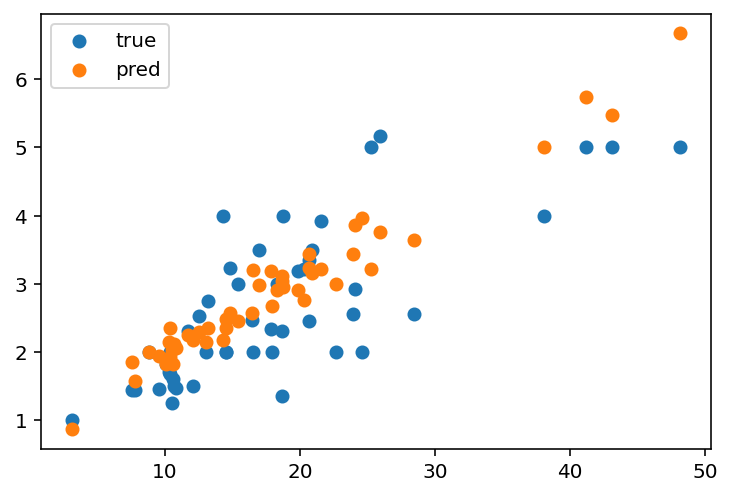

In [140]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()